## Problem Solving In Industry

### Project: Menu Assistance 

Kelly and Leo

###   Table of Contents:<a name="b"></a>

0. [Importing the required libraries for EDA](#0)
1. [Business Understanding ](#1)
2. [Data Undertanding](#2)                     
    2.1. [Loading the data into the Data Frame](#2.1)             
3. [Data Preparation](#3)                                                                                           
    3.1. [Data Integration](#3.1)     
4. [Modelling](#4)

---
## Importing libraries to be used in the project<a name="0"></a>
----

In [1]:
#libraries to be used in the project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

----
## 1. Business understanding<a name="1"></a>
-----
In this phase of the CRISP-DM process will be to determine the business objectives of our project, we will evaluate the aspects of the situation to produce the project plan, and from this which tools, datasets and machine learning will be used.
Our business proposal is to help chefs to create dishes for their restaurants with more accuracy and higher probability to be ordered by their customers. 
The main business goal of our project is to predict what ingredients customers would like to eat and from that, give restaurants ingredient suggestions to create their next menu. 
Therefore, our target clients would be restaurants, the business goal is to upgrade their menu, improve taste satisfaction to attract new customers and to keep existing ones.

(Please, read more in our Report)

----
## 2. Data understanding<a name="2"></a>
-----

In the second phase of the CRISP-DM process we are going to access the data using the resources listed in the first stage in Project resources. This stage is important for understanding the data and it will help us to make decisions during data  preparation.
We will cover collecting and describing the data, exploring the data using EDA to perform the investigations on our dataset and verifying the data quality. 

-------
#### Fruit and vegetables consumptiondataset

- Loading the dataset using pandas

In [2]:
dataFruitVeg = pd.read_csv("daily_consumption_fruit_vegetables_eu.csv")
dataFruitVeg.head()

,unit,n_portion,sex,age,country,time,value
0,PC,0,F,TOTAL,AT,2019,29.1
1,PC,0,F,TOTAL,BE,2019,17.1
2,PC,0,F,TOTAL,BG,2019,54.2
3,PC,0,F,TOTAL,CY,2019,32.7
4,PC,0,F,TOTAL,CZ,2019,49.6


- Using the methios .shape() to check how many columns and rows are in the dataset.

In [3]:
dataFruitVeg.shape

(43488, 7)

We can see that our Fruit/Veg dataset has 43488 rows and 7 columns.

- Using the method info() to check multiple infomrtion in the dataset. 

In [4]:
#to check data types
dataFruitVeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43488 entries, 0 to 43487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       43488 non-null  object 
 1   n_portion  43488 non-null  object 
 2   sex        43488 non-null  object 
 3   age        43488 non-null  object 
 4   country    43488 non-null  object 
 5   time       43488 non-null  int64  
 6   value      35610 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


With the method info() we can see the number of the columns/variables, total number of rows (the size of the dataset), data types (if the variable is quantitative or qualitative), the memory usage also.

In [5]:
dataFruitVeg.describe()

,time,value
count,43488.000000,35610.000000
mean,2016.500000,33.190211
std,2.500029,20.122211
min,2014.000000,0.000000
25%,2014.000000,14.000000
50%,2016.500000,33.600000
75%,2019.000000,48.900000
max,2019.000000,94.100000


- Using .value_counts() to check the amount of entries and counts of unique values.

In [6]:
dataFruitVeg['time'].value_counts()

2019    21744
2014    21744
Name: time, dtype: int64

As we can see above there are only two years in the Fruit/Veg dataset 2014 and 2019, for now we can see that the values are the same for both years.

In [7]:
dataFruitVeg['country'].value_counts()

AT           1296
BE           1296
TR           1296
SK           1296
SI           1296
SE           1296
RO           1296
PT           1296
PL           1296
NO           1296
NL           1296
MT           1296
LV           1296
LU           1296
LT           1296
IT           1296
IS           1296
IE           1296
HU           1296
BG           1296
CY           1296
CZ           1296
DE           1296
DK           1296
EE           1296
EL           1296
ES           1296
EU28         1296
FI           1296
FR           1296
HR           1296
UK           1296
EU27_2020    1080
RS            936
Name: country, dtype: int64

We can see that our dataset has Ireland represented by IE with 1296 values.

- Ploting using Pie Chart matplotlib to check the country's consumption.

<AxesSubplot:ylabel='value'>

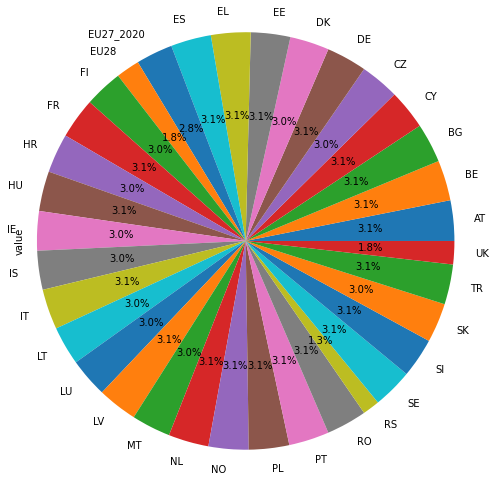

In [8]:
pieEDA_dataFruitVeg = dataFruitVeg.groupby('country')['value'].sum()
pieEDA_dataFruitVeg.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

Text(0, 0.5, 'Value/Quantity')

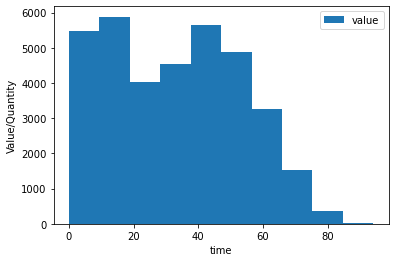

In [9]:
#dataFruitVeg.plot(kind = 'hist', x='time', figsize=(15,10))
dataFruitVeg.plot(kind = 'hist', x='time')
plt.xlabel("time")
plt.ylabel("Value/Quantity")

#### Fish and Seafood consumption dataset 

- Loading the dataset uning pandas

In [10]:
dataFish = pd.read_csv("fish-and-seafood-consumption-per-capita.csv")
dataFish.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


- Using the method .shape() to check how many columns and rows are in the dataset.

In [11]:
dataFish.shape

(11028, 4)

We can see that our Fish/Seafood dataset has 11028 rows and 4 columns.

- Using the method info() to check multiple infomrtion in the dataset. 

In [12]:
#to check data types
dataFish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          11028 non-null  object 
 1   Code                                                            9294 non-null   object 
 2   Year                                                            11028 non-null  int64  
 3   Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)  11028 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 344.8+ KB


In [13]:
dataFish.describe()

,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
count,11028.000000,11028.000000
mean,1989.461824,16.670872
std,16.320065,17.056281
min,1961.000000,0.000000
25%,1975.000000,5.340000
50%,1990.000000,11.995000
75%,2004.000000,22.512500
max,2017.000000,191.750000


- Using .value_counts() to check the amount of entries and counts of unique values.

In [14]:
#check if ireland is included
dataFish['Code'].value_counts()

AFG         57
NIC         57
MOZ         57
MMR         57
NAM         57
            ..
BEL         18
OWID_SRM    14
MNE         12
SRB         12
SDN          6
Name: Code, Length: 182, dtype: int64

- Plotting a bar to explore the type of meat in the dataset and their consumption values in percentage.

<AxesSubplot:xlabel='Code'>

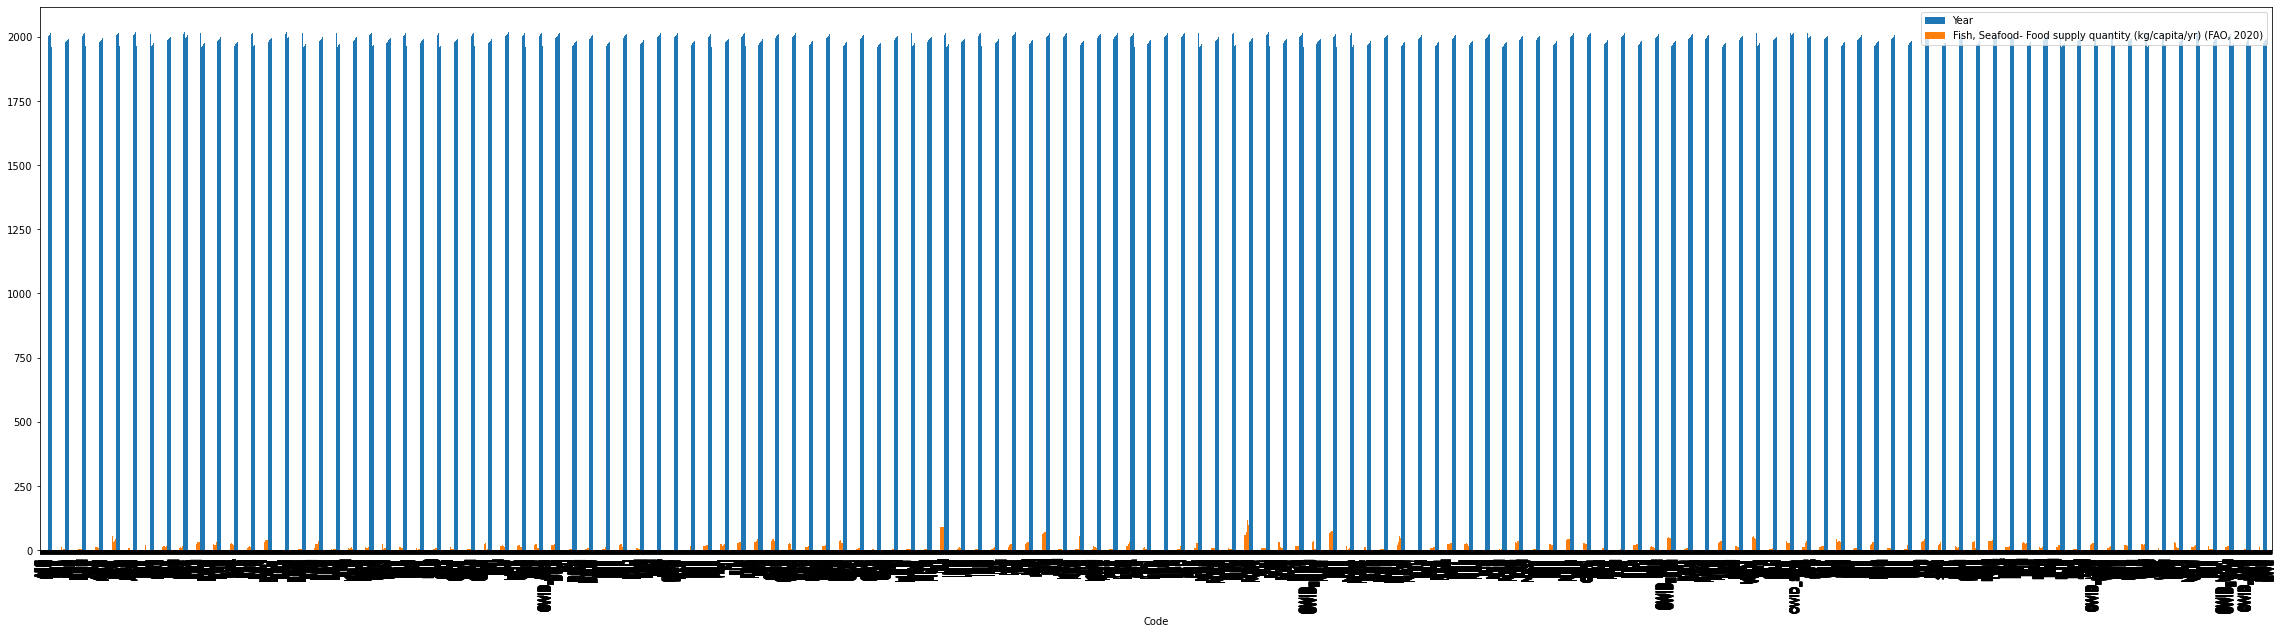

In [15]:
dataFish.plot(kind = 'bar', x='Code', figsize=(40,10))

In [16]:
#dataFish = dataFish.groupby('Code')['Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'].sum()
#dataFish.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

---
#### Meat consumption dataset 

- Loading the dataset uning pandas

In [17]:
dataMeatCon = pd.read_csv("meat_consumption_worldwide.csv") 
dataMeatCon.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


- Using the method .shape() to check how many columns and rows are in the dataset.

In [18]:
dataMeatCon.shape

(13760, 5)

We can see that our Meat dataset has 13760, rows and 5 columns.

- Using the method info() to check multiple information in the dataset. 

In [19]:
#to check data types
dataMeatCon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB


In [20]:
dataMeatCon.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


- Using .value_counts() to check the amount of entries and counts of unique values.

In [21]:
dataMeatCon['LOCATION'].value_counts()

MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: LOCATION, dtype: int64

Exploring the dataset, we did not find Ireland, but we found the EU28 with 276 values. We will probably use it in the data preparation phase.

- Plotting a Pie Chart to explore the type of meat in the dataset and their consumption values in percentage.

<AxesSubplot:ylabel='Value'>

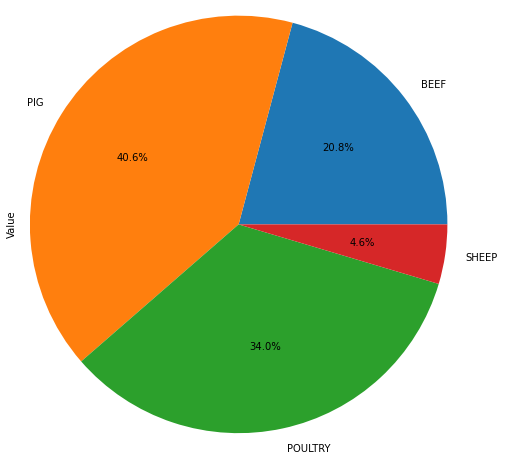

In [22]:
pieEDA_dataMeatCon = dataMeatCon.groupby('SUBJECT')['Value'].sum()
pieEDA_dataMeatCon.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

We can see in the plot above that worldwide the consumption of PIG is the highest in comparison to the other types of meat and that SHEEP is the lowest. In data preparation after cleaning the data, we will be able to check these values for EU28 and see if any change will occur.

---
#### Recipes Ingredients dataset 

- Loading the dataset uning pandas

In [23]:
#dataRecipes = pd.read_csv("recipes.csv") 
#dataRecipes.head()

- Using .shape to check how many columns and rows are in the dataset.

In [24]:
#dataRecipes.shape

- Using the method .info() to check multiple information in the dataset. 

In [25]:
#to check data types
#dataRecipes.info()

In [26]:
#dataRecipes.describe()

- Using .value_counts() method to check the amount of entries and counts of unique values.

In [27]:
#dataRecipes.value_counts() 

- Checking for Outliners in the dataset

In [28]:
#dataRecipes.plot(kind="box", subplots=True, figsize=(15,20), layout=(10,4))
#plt.show()

- Using the method .duplicated() to check is there are any duplicate rows in the dataset

With the method .duplicated() we can see if there are duplicate rows in our dataset, but it shows that non of the 51 rows (0, 51) are duplicated.

------
#### Grocery dataset

- Loading the dataset uning pandas

In [29]:
#datagrocery = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
#datagrocery.head()

- Using .shape to check how many columns and rows are in the dataset.

In [30]:
#datagrocery.shape

- Using the method .info() to check multiple information in the dataset. 

In [31]:
#datagrocery.info()

In [32]:
#datagrocery.describe()

- Using .value_counts() method to check the amount of entries and counts of unique values.

In [33]:
#datagrocery['Sub Category'].value_counts()

In [34]:
#plt.figure(figsize=(16,6))
#heatmap = sns.heatmap(datagrocery.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
#heatmap.set_title('Grocery - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [35]:
#pieEDA_datagrocery = datagrocery.groupby('Sub Category')['Sales'].sum()
#pieEDA_datagrocery.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

----
## 3. Data preparation<a name="3"></a>
----- 

#### Fruit and vegetables dataset - Preparation

In [36]:
dataFruitVeg.shape

(43488, 7)

In [37]:
dataFruitVeg.isnull().values.any()

True

In [38]:
duplicate_rows_dataFruitVeg = dataFruitVeg[dataFruitVeg.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFruitVeg.shape)

The number of duplicate rows are:  (5888, 7)


In [39]:
dataFruitVeg1 = dataFruitVeg

In [40]:
#using .dropna() to remove any NA
dataFruitVeg1 = dataFruitVeg1.replace('?', np.nan)
dataFruitVeg1 = dataFruitVeg1.dropna()
dataFruitVeg1 = dataFruitVeg1.apply(pd.to_numeric, errors='ignore')
#.drop_duplicates()
dataFruitVeg1 = dataFruitVeg1.drop_duplicates()

In [41]:
duplicate_rows_dataFruitVeg = dataFruitVeg1[dataFruitVeg1.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFruitVeg.shape)

The number of duplicate rows are:  (0, 7)


In [42]:
dataFruitVeg1.isnull().values.any()

False

In [43]:
dataFruitVeg1.shape

(35188, 7)

In [44]:
dataFruitVeg2 = dataFruitVeg1.rename(columns={'time': 'year'})
dataFruitVeg2.head()

,unit,n_portion,sex,age,country,year,value
0,PC,0,F,TOTAL,AT,2019,29.1
1,PC,0,F,TOTAL,BE,2019,17.1
2,PC,0,F,TOTAL,BG,2019,54.2
3,PC,0,F,TOTAL,CY,2019,32.7
4,PC,0,F,TOTAL,CZ,2019,49.6


In [45]:
dataFruitVeg3 = dataFruitVeg2.drop(columns=['unit', 'n_portion','sex', 'age'])
dataFruitVeg3.head()

,country,year,value
0,AT,2019,29.1
1,BE,2019,17.1
2,BG,2019,54.2
3,CY,2019,32.7
4,CZ,2019,49.6


In [46]:
#dataFruitVeg3['ingredient'] = pd.Series(["VEGETABLE" for x in range(len(dataFruitVeg3.index))])
dataFruitVeg3.insert(1,'ingredient','VEGETABLE')
dataFruitVeg3.head()

,country,ingredient,year,value
0,AT,VEGETABLE,2019,29.1
1,BE,VEGETABLE,2019,17.1
2,BG,VEGETABLE,2019,54.2
3,CY,VEGETABLE,2019,32.7
4,CZ,VEGETABLE,2019,49.6


In [47]:
#isolating ireland 
IEfruit_df = dataFruitVeg3.loc[dataFruitVeg3['country'] == ('IE')]
IEfruit_df.head()

,country,ingredient,year,value
16,IE,VEGETABLE,2019,24.5
82,IE,VEGETABLE,2019,27.3
116,IE,VEGETABLE,2019,27.9
183,IE,VEGETABLE,2019,26.7
281,IE,VEGETABLE,2019,44.1


In [48]:
IEfruit_df.shape

(1078, 4)

Text(1.0, 1.0, 'Ireland Fruit&Vegetables consumption')

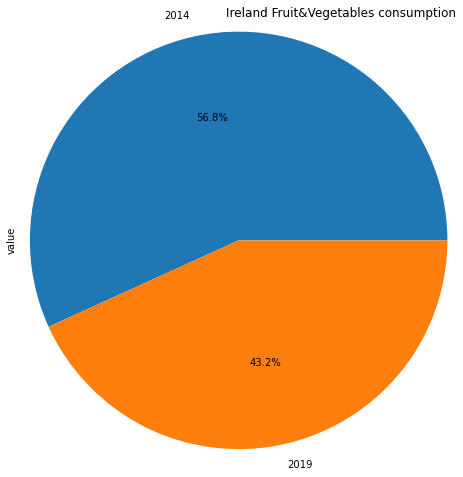

In [49]:
pie_IEfruit_df = IEfruit_df.groupby('year')['value'].sum()
pie_IEfruit_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("Ireland Fruit&Vegetables consumption", loc = 'right')

In [81]:
#IEfruit.plot(kind = 'kde', x='country', y='value', figsize=(15,10))
#plt.title("Ireland Fruit&Vegetables consumption")
#plt.ylabel("Value/Quantity")

Text(0.5, 1.0, 'Ireland Fruit&Vegetables consumption')

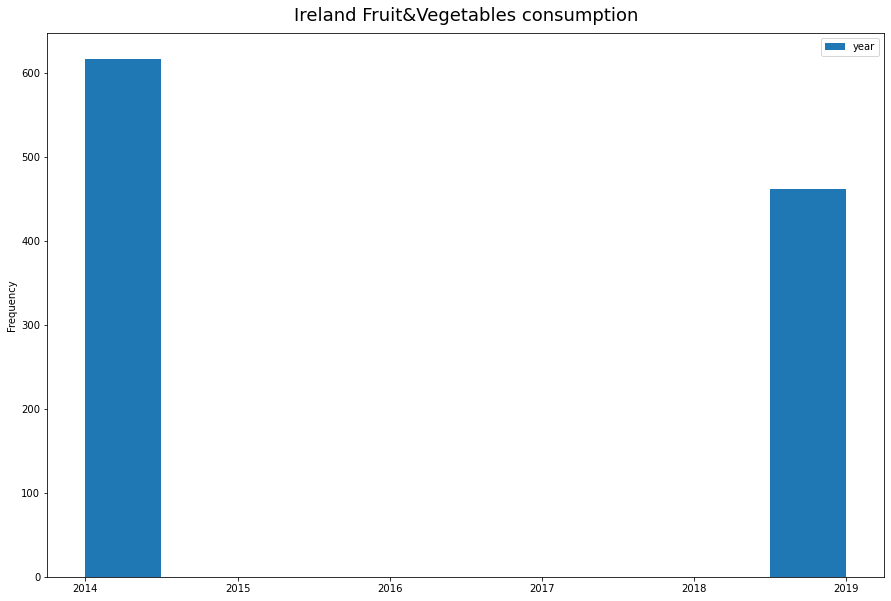

In [50]:
IEfruit_df.plot(kind = 'hist', x='country', y='year',figsize=(15,10))
plt.title("Ireland Fruit&Vegetables consumption", fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Fruit&Vegetables - Correlation Heatmap')

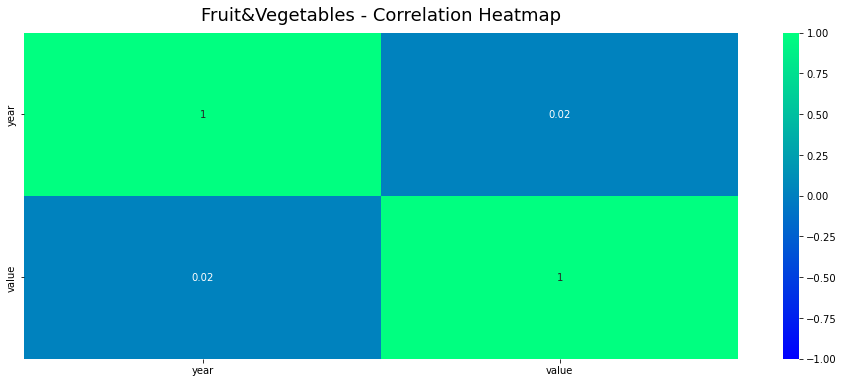

In [51]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(IEfruit_df.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Fruit&Vegetables - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

---------
#### Fish and Seafood dataset - Preparation

In [52]:
dataFish.shape

(11028, 4)

In [53]:
dataFish.isnull().values.any()

True

In [54]:
duplicate_rows_dataFish = dataFish[dataFish.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFish.shape)

The number of duplicate rows are:  (0, 4)


In [55]:
dataFish1 = dataFish

In [56]:
#using .dropna() to remove any NA
dataFish1 = dataFish1.replace('?', np.nan)
dataFish1 = dataFish1.dropna()
dataFish1 = dataFish1.apply(pd.to_numeric, errors='ignore')

In [57]:
dataFish1.isnull().values.any()

False

In [58]:
dataFish1.shape

(9294, 4)

In [59]:
dataFish2 = dataFish1.rename(columns={'Year': 'year','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'value','Code':'country'})
dataFish2.head()

,Entity,country,year,value
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


In [60]:
dataFish3 = dataFish2.drop(columns=['Entity'])
dataFish3.head()

,country,year,value
0,AFG,1961,0.03
1,AFG,1962,0.03
2,AFG,1963,0.03
3,AFG,1964,0.03
4,AFG,1965,0.03


In [61]:
dataFish3.insert(1,'ingredient','FISH&SEAFOOD')
dataFish3.tail()

,country,ingredient,year,value
11023,ZWE,FISH&SEAFOOD,2013,2.82
11024,ZWE,FISH&SEAFOOD,2014,3.39
11025,ZWE,FISH&SEAFOOD,2015,3.82
11026,ZWE,FISH&SEAFOOD,2016,3.79
11027,ZWE,FISH&SEAFOOD,2017,3.73


In [62]:
dataFish4 = dataFish3.replace({'country': 'IRL'}, 'IE')

In [63]:
#isolate IRL Ireland 
IEFish_df = dataFish4.loc[dataFish4['country'] == ('IE')]
IEFish_df.head()

,country,ingredient,year,value
4708,IE,FISH&SEAFOOD,1961,7.10
4709,IE,FISH&SEAFOOD,1962,7.28
4710,IE,FISH&SEAFOOD,1963,8.12
4711,IE,FISH&SEAFOOD,1964,8.59
4712,IE,FISH&SEAFOOD,1965,9.56


Text(0.5, 1.0, 'Ireland Fish&Seafood consumption')

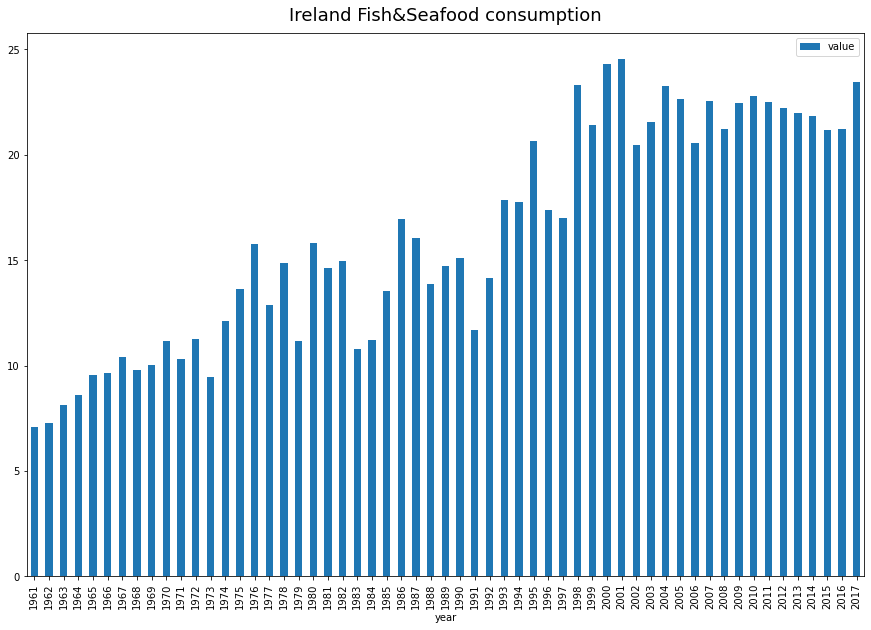

In [64]:
IEFish_df.plot(kind = 'bar', x='year', figsize=(15,10))
plt.title("Ireland Fish&Seafood consumption", fontdict={'fontsize':18}, pad=12)

Text(0.0, 1.0, 'Ireland Fish&Seafood consumption')

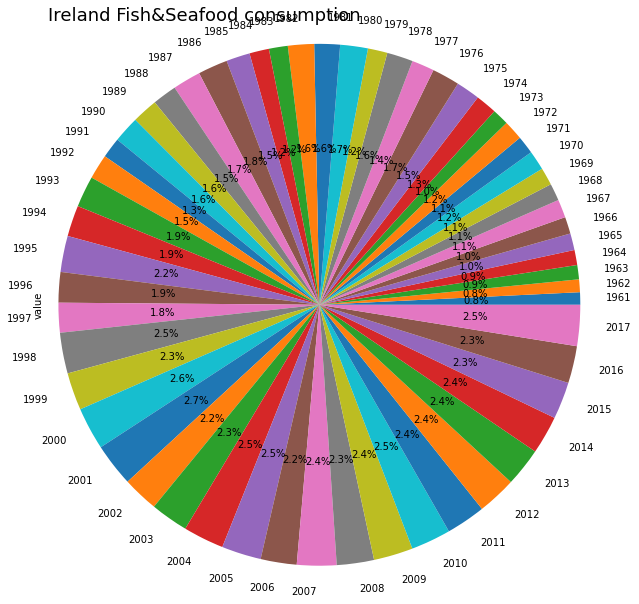

In [65]:
pie_IEFish_df = IEFish_df.groupby('year')['value'].sum()
pie_IEFish_df.plot.pie(figsize=(10,10), radius=1.2, autopct='%1.1f%%')
plt.title("Ireland Fish&Seafood consumption", loc = 'left', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Fish&Seafood - Correlation Heatmap')

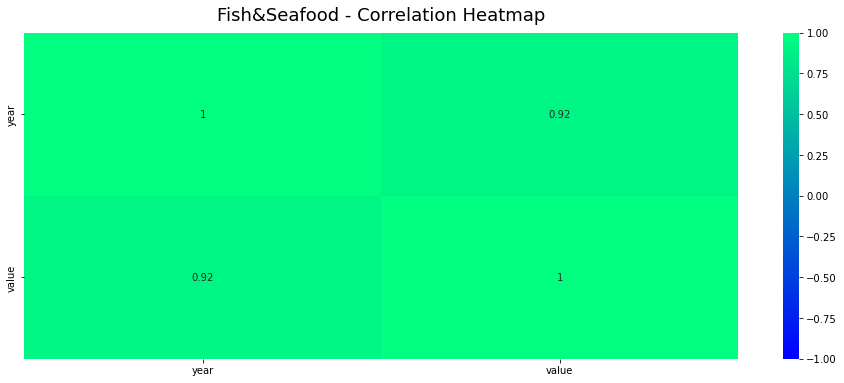

In [66]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(IEFish_df.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Fish&Seafood - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

----
#### Meat consumption dataset - Preparation
(by different types of meat)

In [67]:
dataMeatCon.shape

(13760, 5)

In [68]:
dataMeatCon.isnull().values.any()

False

In [69]:
duplicate_rows_dataMeatcon = dataMeatCon[dataMeatCon.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataMeatcon.shape)

The number of duplicate rows are:  (0, 5)


In [70]:
dataMeatCon1 = dataMeatCon

In [71]:
dataMeatCon2 = dataMeatCon1.rename(columns={'TIME': 'year','Value': 'value','LOCATION': 'country','SUBJECT': 'ingredient'})
dataMeatCon2.head()

,country,ingredient,MEASURE,year,value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [72]:
dataMeatCon3 = dataMeatCon2.drop(columns=['MEASURE'])
dataMeatCon3.head()

,country,ingredient,year,value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094
3,AUS,BEEF,1994,25.456134
4,AUS,BEEF,1995,25.340226


In [73]:
#isolate EU28
EUMeat_df = dataMeatCon3.loc[dataMeatCon3['country'] == ('EU28')]
EUMeat_df.head()

,country,ingredient,year,value
6580,EU28,BEEF,2000,12.677364
6581,EU28,BEEF,2001,12.009464
6582,EU28,BEEF,2002,12.535008
6583,EU28,BEEF,2003,12.314197
6584,EU28,BEEF,2004,12.520383


### Visualisation after Cleaning & Construction

Text(0.0, 1.0, 'EU28 Meat consumption')

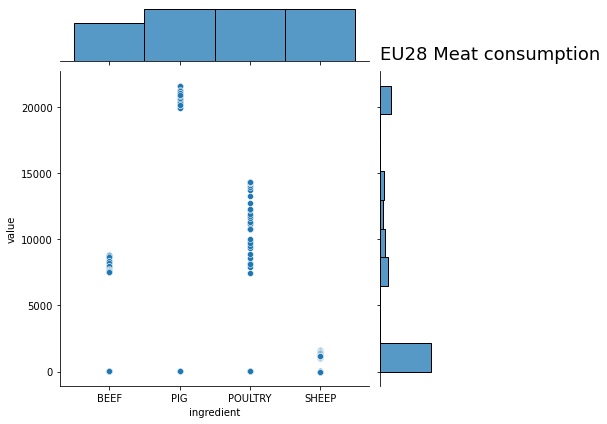

In [74]:
#sns.distplot(EUdataMeatcon.TIME)
sns.jointplot(x="ingredient", y="value", data=EUMeat_df);
plt.title("EU28 Meat consumption", loc='left', fontdict={'fontsize':18}, pad=12)

- Plotting using Pie to explore the consumption in EU28

Text(0.0, 1.0, 'EU28 Meat consumption')

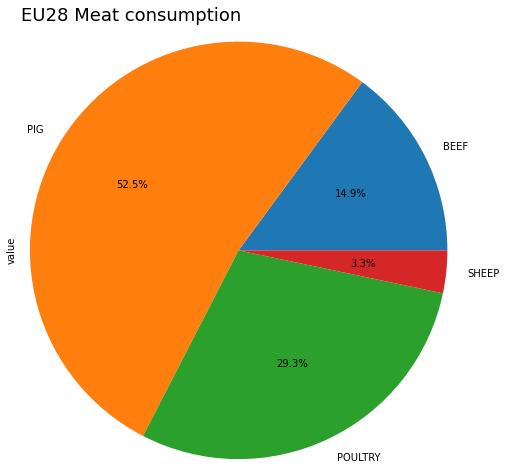

In [75]:
pie_EUMeat_df = EUMeat_df.groupby('ingredient')['value'].sum()
pie_EUMeat_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("EU28 Meat consumption", loc='left', fontdict={'fontsize':18}, pad=12)

We see that the above plot has a different result in comparison the same graphic worldwide figures.
Here we can see that EU28 consumes more PIG and less BEEF in comparison with the worldwide figures.

Text(0.5, 1.0, 'Meat - Correlation Heatmap')

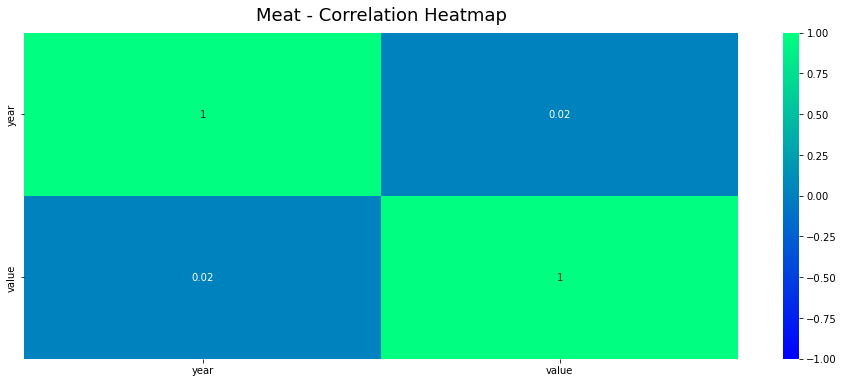

In [76]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(EUMeat_df.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('Meat - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

----
#### Ingredients based on recipes dataset - Preparation

In [77]:
#dataRecipes1 = dataRecipes

In [78]:
#dataRecipes1.isnull().values.any()

In [79]:
#using .dropna() to remove any NA
#dataRecipes1 = dataRecipes1.replace('?', np.nan)
#dataRecipes1 = dataRecipes1.dropna()
#dataFish1 = dataFish1.apply(pd.to_numeric, errors='ignore')

In [80]:
#dataRecipes1.isnull().values.any()

In [81]:
#duplicate_rows_dataRecipes = dataRecipes[dataRecipes.duplicated()]
#print("The number of duplicate rows are: ", duplicate_rows_dataRecipes.shape)

In [82]:
#plt.figure(figsize=(16,6))
#heatmap = sns.heatmap(dataRecipes.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
#heatmap.set_title('Recipes - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

### 3.1. Data Integration <a name="3.1"></a>

In [94]:
pieces = {"a":dataFruitVeg3,"b":dataFish4,"c":dataMeatCon3} 
TOTALdataIngredients = pd.concat(pieces)

In [95]:
TOTALdataIngredients.shape

(58242, 4)

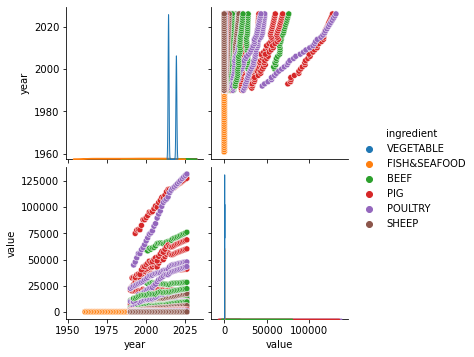

In [136]:
sns.pairplot(TOTALdataIngredients, hue = 'ingredient')

<Figure size 720x720 with 0 Axes>

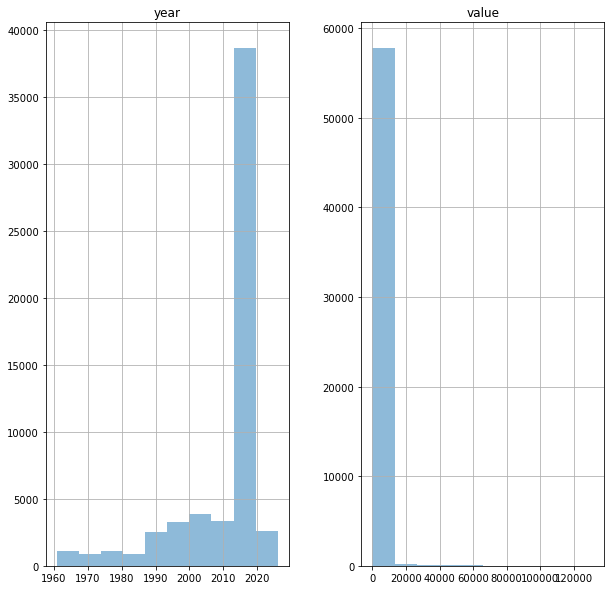

In [126]:
plt.figure (figsize= (10,10))
TOTALdataIngredients.hist(alpha = 0.5, figsize = (10,10))
plt.show()

Text(0.0, 1.0, 'All countries consumption')

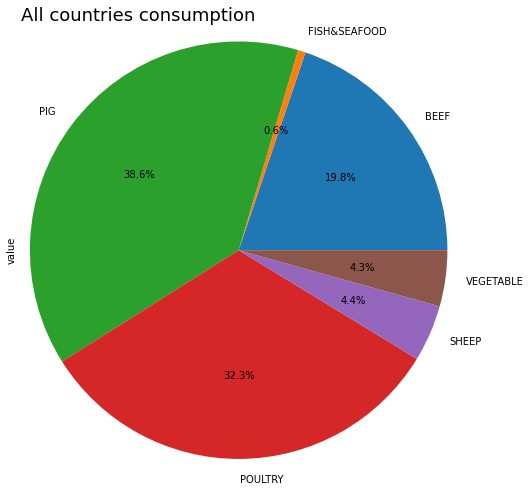

In [120]:
pie_EUMeat_df = TOTALdataIngredients.groupby('ingredient')['value'].sum()
pie_EUMeat_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("All countries consumption", loc='left', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'All countries Ingredients - Correlation Heatmap')

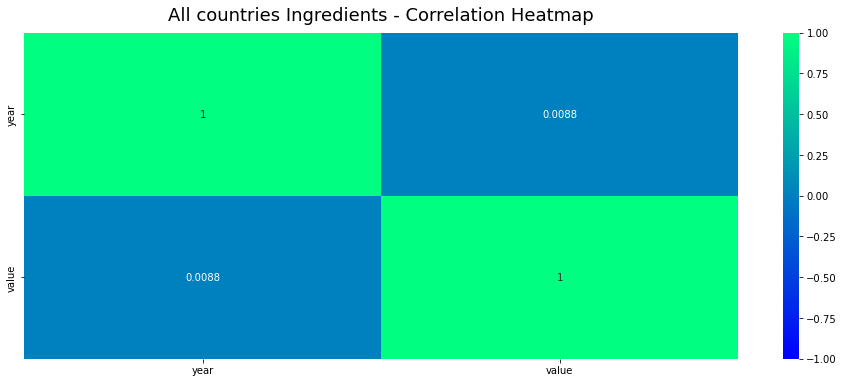

In [112]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(TOTALdataIngredients.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('All countries Ingredients - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [113]:
pieces = {"a":IEfruit_df,"b":IEFish_df,"c":EUMeat_df} 
IE_EU28dataIngredients = pd.concat(pieces)

In [114]:
IE_EU28dataIngredients.head()

country ingredient  year  value
a 16       IE  VEGETABLE  2019   24.5
  82       IE  VEGETABLE  2019   27.3
  116      IE  VEGETABLE  2019   27.9
  183      IE  VEGETABLE  2019   26.7
  281      IE  VEGETABLE  2019   44.1

In [115]:
IE_EU28dataIngredients.shape

(1411, 4)

<AxesSubplot:xlabel='count', ylabel='ingredient'>

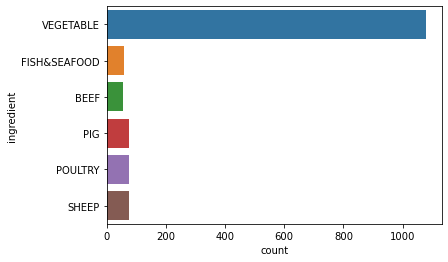

In [141]:
sns.countplot(y='ingredient', data=IE_EU28dataIngredients)

<Figure size 720x720 with 0 Axes>

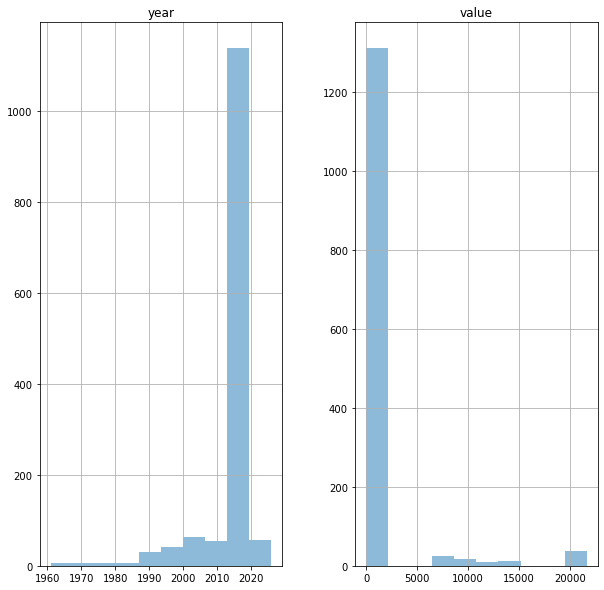

In [128]:
plt.figure (figsize= (10,10))
IE_EU28dataIngredients.hist(alpha = 0.5, figsize = (10,10))
plt.show()

Text(0.0, 1.0, 'IE & EU28 consumption')

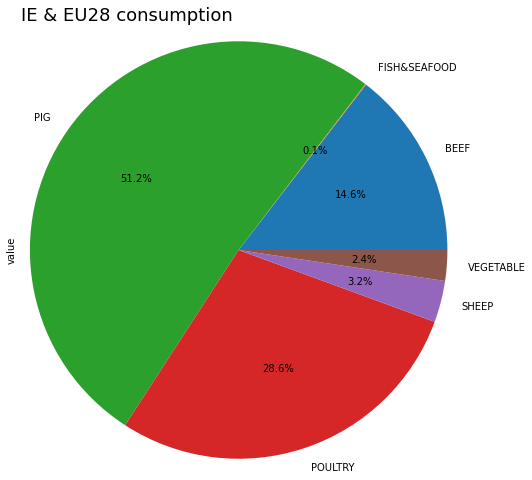

In [123]:
pie_EUMeat_df = IE_EU28dataIngredients.groupby('ingredient')['value'].sum()
pie_EUMeat_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("IE & EU28 consumption", loc='left', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'IE & EU28 Ingredients - Correlation Heatmap')

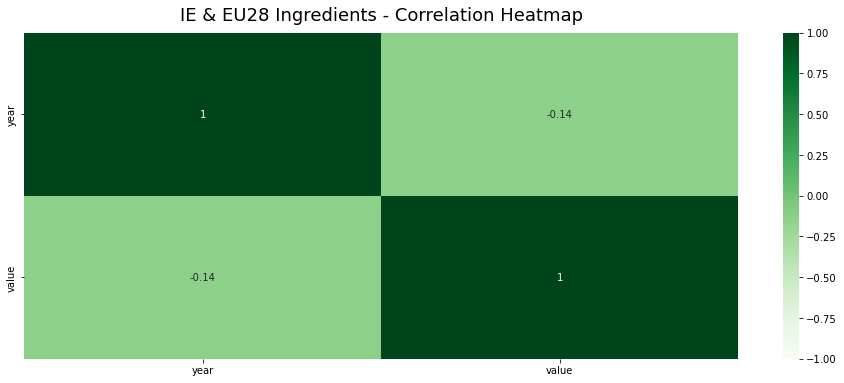

In [116]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(IE_EU28dataIngredients.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('IE & EU28 Ingredients - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

----
## 4. Modelling<a name="4"></a>
----

#### Linear Regression Algorithm

- Split - Linear Regression

Splitting Train set and Test set, where the train set will be used to help the algorithm in learning the dataset' behavior.

    - Training Linear Regression

    - Testing Linear Regression

- Confusion Matrix - Linear Regression Algorithm

#### K-Nearest Neighbors (KNN) Algorithm

- Split - KNN

Splitting Train set and Test set, where the train set will be used to help the algorithm in learning the dataset' behavior.

    - Training KNN

    - Testing KNN

#### Decision Tree Algorithm

- Split - Decision Tree

Splitting Train set and Test set, where the train set will be used to help the algorithm in learning the dataset' behavior.

    - Training Decision Tree

    - Testing Decision Tree

- Confusion Matrix - Decision Tree Algorithm 